To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Investigate the data and do any necessary data cleaning.

Explore the data and find some variables that you think would be useful in the prediction of the house prices.

Build your initial model using these features and estimate the parameters using OLS.

Bu atamayı tamamlamak için, aşağıdaki görevlere yönelik çözümlerinizi içeren bir Jupyter not defterine bağlantı gönderin:

Verileri araştırın ve gerekli veri temizliğini yapın.

Verileri araştırın ve ev fiyatlarının tahmin edilmesinde faydalı olacağını düşündüğünüz bazı değişkenleri bulun.

Bu özellikleri kullanarak ilk modelinizi oluşturun ve OLS kullanarak parametreleri tahmin edin.

# Q-1


1-Investigate the data and do any necessary data cleaning.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  scipy.stats import zscore
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [6]:
house_train = pd.read_csv("house_train.csv")

In [7]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
for col in house_train.columns:
    print(house_train[col].name,":",sum(pd.isnull(house_train[col])))

Id : 0
MSSubClass : 0
MSZoning : 0
LotFrontage : 259
LotArea : 0
Street : 0
Alley : 1369
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 8
MasVnrArea : 8
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinSF1 : 0
BsmtFinType2 : 38
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 1
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
KitchenQual : 0
TotRmsAbvGrd : 0
Functional : 0
Fireplaces : 0
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageCars : 0
GarageArea : 0
GarageQual : 81
GarageCond : 81
PavedDrive : 0
WoodDeckSF :

In [10]:
numeric = house_train.select_dtypes(exclude=['object'])
for n,c in numeric.items():
    numeric[n]= c.fillna(c.median())

In [11]:
object = house_train.select_dtypes(exclude=["number"])
for n,c in object.items():
    object[n]= c.fillna(c.mode()[0])


In [12]:
all_data =  pd.concat([numeric,object],  axis=1)
all_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,

# Q-2

2-Explore the data and find some variables that you think would be useful in the prediction of the house prices.


In [13]:
all_data["central_air"]=pd.get_dummies(all_data["CentralAir"], drop_first=True)


In [14]:
all_data.corr()["SalePrice"].reset_index()

,index,SalePrice
0,Id,-0.021917
1,MSSubClass,-0.084284
2,LotFrontage,0.334771
3,LotArea,0.263843
4,OverallQual,0.790982
5,OverallCond,-0.077856
6,YearBuilt,0.522897
7,YearRemodAdd,0.507101
8,MasVnrArea,0.472614
9,BsmtFinSF1,0.386420


En büyük korelasyona sahip değişkenlere bakarım. Bunlar için belirlediğim sınıf 0.5'ten büyük olması. GrLivArea, OverallQual

# Q-3


3- Build your initial model using these features and estimate the parameters using OLS.


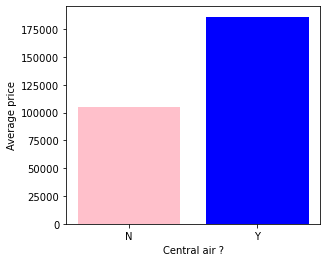

In [15]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.bar(all_data.groupby("CentralAir")["SalePrice"].mean().index, all_data.groupby("CentralAir")["SalePrice"].mean(),
       color=("pink","blue"))
plt.ylabel("Average price")
plt.xlabel("Central air ?")
plt.xticks([0,1])
plt.show()

Regresyon modelini oluşturmak için 3 değişken seçtim GrLivArea, OverallQual, Central_air

In [16]:
all_data["centralAir_"]=pd.get_dummies(all_data["CentralAir"], drop_first=True)

Y = all_data["SalePrice"]
X = all_data[["centralAir_","OverallQual","GrLivArea"]]

In [17]:
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

LinearRegression()

In [19]:
print("\nCoefficients:\n",lrm.coef_)
print("\nIntercept:\n",lrm.intercept_)


Coefficients:
 [21425.89755253 31572.65676009    56.91201858]

Intercept:
 -117930.23009834447


In [20]:
X= sm.add_constant(X)
results = sm.OLS(Y,X).fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     1237.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:44:20   Log-Likelihood:                -17619.
No. Observations:                1460   AIC:                         3.525e+04
Df Residuals:                    1456   BIC:                         3.527e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.179e+05   5849.497    -20.161      0.000   -1.29e+05   -1.06e+05
centralAir_  2.143e+04   4672.438      4.586      0.000    1.23e+04    3.06e+04
OverallQual  3.157e+04   1030.697     30.632      0.000    2.96e+04    3.36e+04
GrLivArea      56.9120      2.622     21.707      0.000      51.769      62.055
==============================================================================
Omnibus:                      364.695   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9436.412
Skew:                           0.552   Prob(JB):                         0.00
Kurtosis:                      15.406   Cond. No.                     9.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""